<a href="https://colab.research.google.com/github/lahmarons/GestionCagnotte/blob/main/finalProjectOns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation de XGBOOST**

In [ ]:
!pip install xgboost --quiet

➡️ XGBoost offre le meilleur compromis précision / robustesse

Importation des bibliothéques EDA et manipulation de fichiers

In [ ]:
import pandas as pd#lire,ecrire,filtrer tabulaire --> csv
import matplotlib.pyplot as plt#pour la visualisation
import seaborn as sns#graphe plus esthetique et plus simple a gerer
import numpy as np#pour le calcule numérique
import os

**Imports pour prétraitement, entraînement et évaluation du modèle**

In [ ]:

from sklearn.model_selection import train_test_split   # Diviser train/test
from sklearn.preprocessing import StandardScaler       # Normalisation/Mise à l'échelle
from xgboost import XGBClassifier                      # Modèle XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Contexte**

Trouvez les meilleures stratégies à améliorer pour la prochaine campagne marketing. Comment l’institution financière peut-elle avoir une plus grande efficacité pour ses futures campagnes marketing ? Pour répondre à cette question, nous devons analyser la dernière campagne marketing réalisée par la banque et identifier les modèles qui nous aideront à tirer des conclusions afin de développer des stratégies futures.

**Dans le cas de ton dataset bank.csv, le type de machine learning utilisé est : (Apprentissage supervisé)Classification**

**La variable cible deposit a deux valeurs possibles **:

yes → 1 (client a accepté l’offre)

no → 0 (client a refusé l’offre)

Donc le modèle doit classer chaque client dans une des deux catégories.

**Description des attributs/caractéristiques :**

Instances / Points de données : Le fichier bank.csv contient 45 211 lignes. Chaque ligne représente un client contacté par une campagne marketing d’une banque.

🔸 2. Attributs / Colonnes : Il y a 17 colonnes .

Exemple de colonnes : age, job, marital, education, balance, contact, etc.

🔸 3. Attribut dépendant : C’est la colonne qu’on veut prédire.

Dans ce cas, il s'agit de :

deposit Cette colonne contient "yes" ou "no", selon que le client a souscrit ou non à un dépôt à terme.

🔸 4. Attributs indépendants / prédicteurs : Les 16 autres colonnes servent à prédire la valeur de deposit.

Ce sont les caractéristiques du client :

âge (age)

profession (job)

état civil (marital)

niveau d’étude (education)

solde du compte (balance)

s’il a un prêt (loan, housing)

et d’autres.

**attributs du client bancaire :**

ge : âge du client (numérique) job : type d'emploi (catégorique : "admin.", "inconnu", "chômeur", "gestion", "femme de ménage", "entrepreneur", "étudiant", "col bleu", "indépendant", " retraité", "technicien", "services") matrimonial : état civil (catégorique : "marié", "divorcé", "célibataire") éducation : niveau d'études le plus élevé du client (catégorique : "inconnu", "secondaire", "primaire", "tertiaire") défaut : le crédit est-il en défaut ? (binaire/2-catégories : "oui", "non") balance : solde annuel moyen, en euros (numérique) housing : a-t-il un prêt logement ? (binaire/2-catégories : "oui", "non") loan : a un prêt personnel ? (binaire/2-catégories : "oui", "non")

**lié au dernier contact de la campagne en cours :**

contact : type de communication du contact (catégorique : "inconnu", "téléphone", "cellulaire") day : dernier jour de contact du mois (numérique) month : mois du dernier contact de l'année (catégorique : "jan", "feb", "mar", ..., "nov", "dec") duration : durée du dernier contact, en secondes (numérique)

**télecharger le dataset Lecture du dataset **

In [ ]:
df = pd.read_csv('bank.csv')

In [ ]:
##Les dimensions de notre dataset sont 2
df.ndim


2

In [ ]:
#Les 5 premiers lignes de notre dataset
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#Nbre des lignes et colonnes du dataset
df.shape


(11162, 17)

In [ ]:
#info() nous donne le résumé des types de données et utilisation mémoire totale
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#résumé statistique pour les colonnes
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
#échantillon aléatoire du DataFrame
df.sample()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9519,56,admin.,single,secondary,no,-273,no,no,cellular,8,jul,119,2,-1,0,unknown,no


In [ ]:
#Résumé des types de données dans df et le nombre de colonnes associées à chaque type.
df.dtypes.value_counts()


,count
object,10
int64,7


<Axes: ylabel='count'>

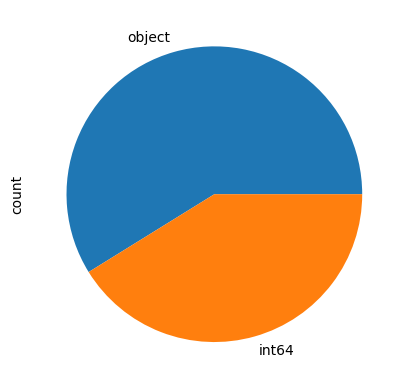

In [ ]:
#Visualisation de sturcture de df et et les proportions de chaque type.
df.dtypes.value_counts().plot.pie()


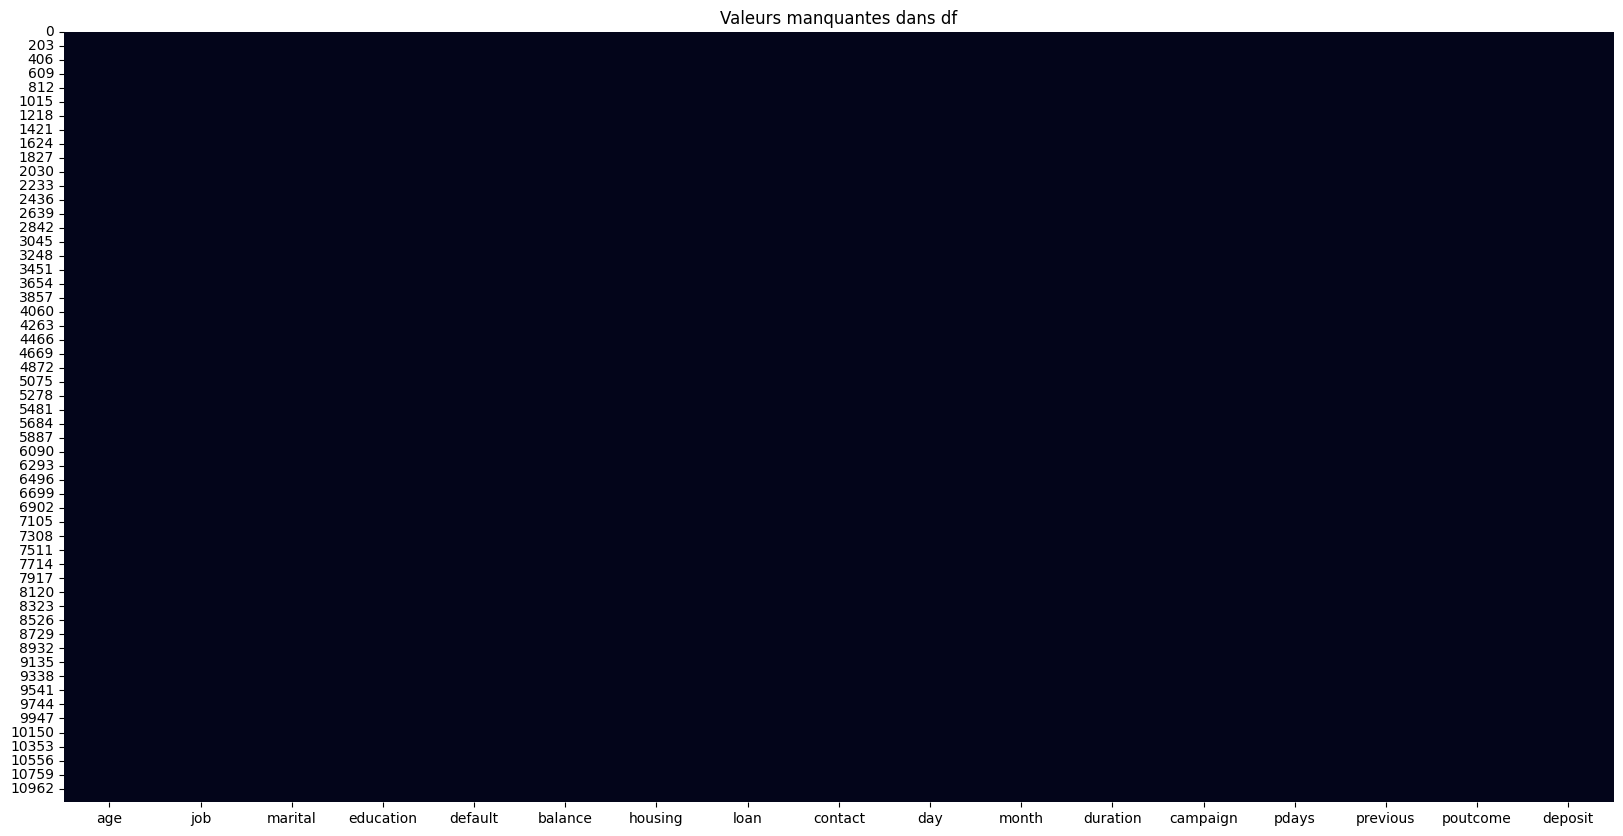

In [ ]:
#Visualisation des valeurs nulls dans une heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.title("Valeurs manquantes dans df")
plt.show()


In [ ]:
#Vérification s'il y a des valeurs nulls dans notre dataset
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Si on trouve des valeurs null on les remplace par la médiane
df = df.fillna(df.median(numeric_only=True))

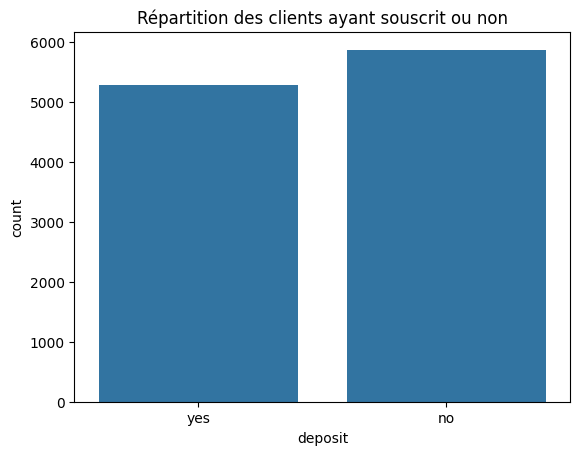

deposit
no     5873
yes    5289
Name: count, dtype: int64


In [ ]:
#Analyse de la variable cible (deposit)
sns.countplot(x='deposit', data=df)
plt.title('Répartition des clients ayant souscrit ou non')
plt.show()

print(df['deposit'].value_counts())

In [ ]:
df.deposit.value_counts()

,count
deposit,
no,5873
yes,5289


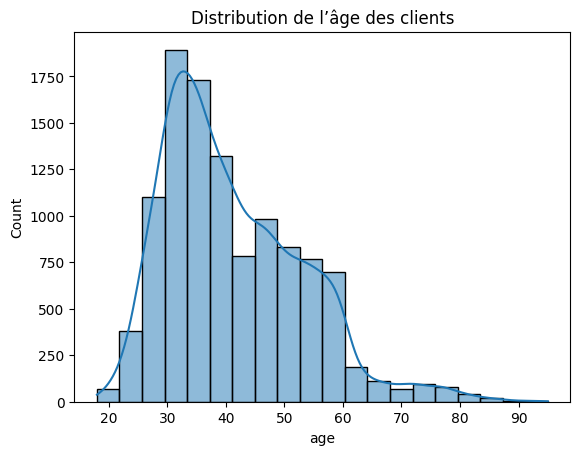

In [ ]:
#Distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution de l’âge des clients')
plt.show()

**quel est l'impact de l'âge sur la souscription au dépôt ?**

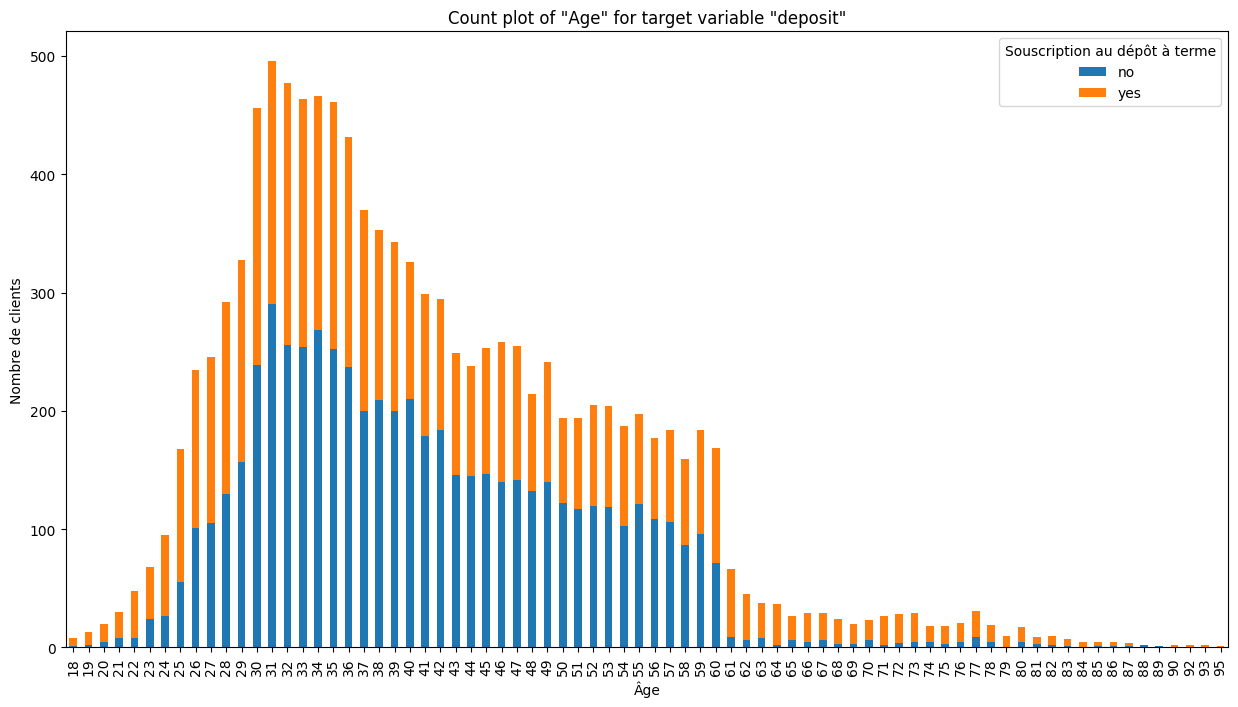

In [ ]:
age_deposit_counts = df.groupby(['age', 'deposit']).size().unstack()
age_deposit_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.title('Count plot of "Age" for target variable "deposit"')
plt.legend(title='Souscription au dépôt à terme', loc='upper right')
plt.show()


Text(0.5, 1.0, 'Count plot of "age_group" for target variable "deposit"')

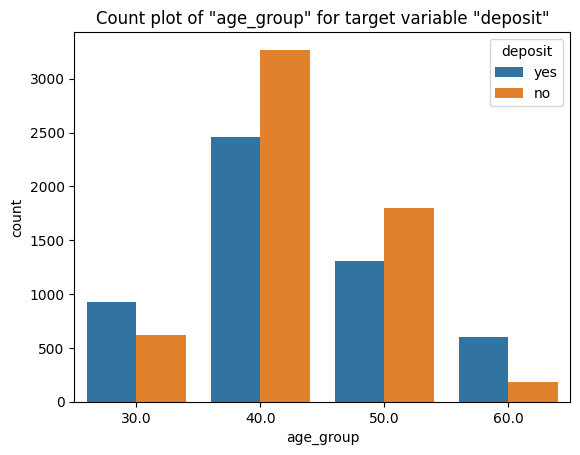

In [ ]:

grps = [df]
for column in grps:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    sns.countplot(x='age_group', data=df, hue='deposit')
plt.title('Count plot of "age_group" for target variable "deposit"')

**Conclusion:**
Les personnes plus âgées sont plus enclines à souscrire à un dépôt en raison de leur stabilité financière.

**Comparaison des différents types d'emplois et la souscription au dépôt**

In [ ]:

df.job.value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


Text(0.5, 1.0, 'Count plot of "jobs" for target variable "deposit"')

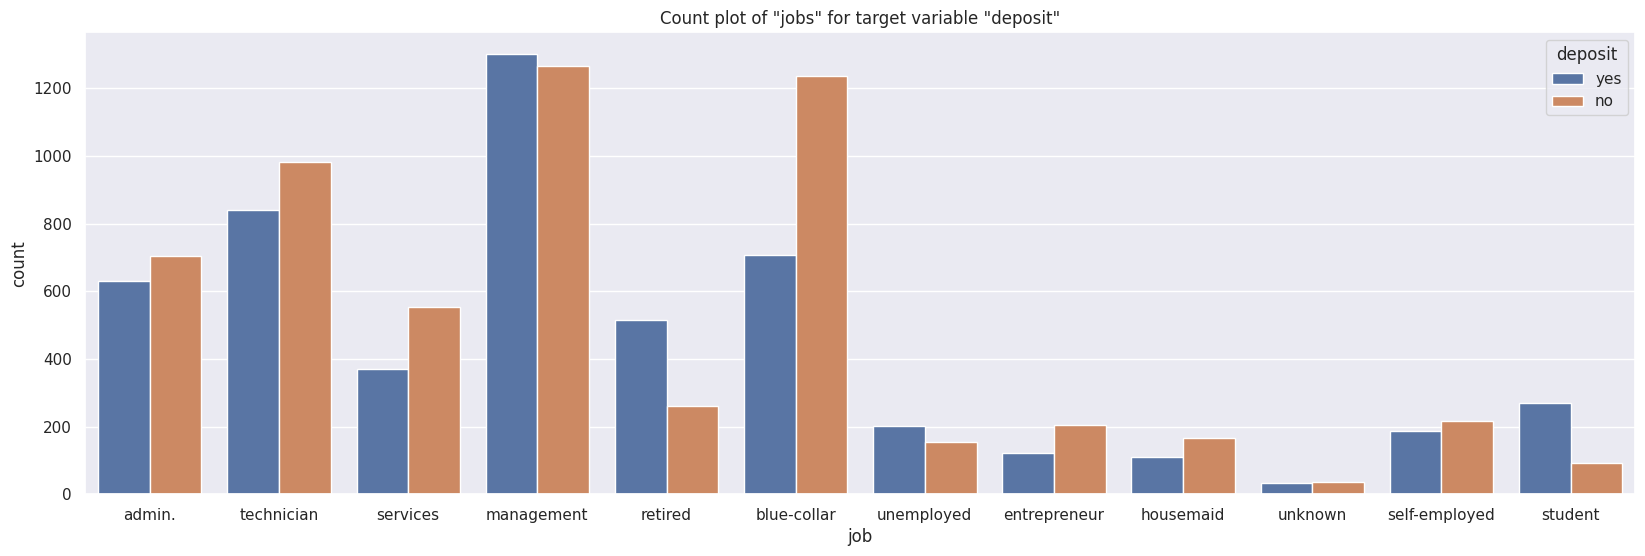

In [ ]:

sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['deposit'])
plt.title('Count plot of "jobs" for target variable "deposit"')

In [ ]:
import pandas as pd


data_dict = {
    'Job': ['Blue-collar', 'Management', 'Technician', 'Admin', 'Services', 'Retired', 'Self-employed',
            'Entrepreneur', 'Unemployed', 'Housemaid', 'Student', 'Unknown'],
    'Total Clients': [
        len(df[df['job'] == 'blue-collar']), len(df[df['job'] == 'management']),
        len(df[df['job'] == 'technician']), len(df[df['job'] == 'admin.']),
        len(df[df['job'] == 'services']), len(df[df['job'] == 'retired']),
        len(df[df['job'] == 'self-employed']), len(df[df['job'] == 'entrepreneur']),
        len(df[df['job'] == 'unemployed']), len(df[df['job'] == 'housemaid']),
        len(df[df['job'] == 'student']), len(df[df['job'] == 'unknown'])
    ],
    'Success Rate': [
        df[df['job'] == 'blue-collar'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'management'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'technician'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'admin.'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'services'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'retired'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'self-employed'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'entrepreneur'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'unemployed'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'housemaid'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'student'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        df[df['job'] == 'unknown'].deposit.value_counts(normalize=True).get('yes', 0) * 100
    ]
}

dataf = pd.DataFrame(data_dict)

dataf

,Job,Total Clients,Success Rate
0,Blue-collar,1944,36.419753
1,Management,2566,50.701481
2,Technician,1823,46.077894
3,Admin,1334,47.301349
4,Services,923,39.978332
5,Retired,778,66.323907
6,Self-employed,405,46.172840
7,Entrepreneur,328,37.500000
8,Unemployed,357,56.582633
9,Housemaid,274,39.781022


***Observations:***
Les clients les plus contactés appartiennent au type d'emploi : 'blue-collar', 'management' & 'technician'.

Le taux de réussite est le plus élevé pour les 'Student'

**quel est l'impact niveau d'éducation sur la souscription au dépôt?**

In [ ]:

df.education.value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


Text(0.5, 1.0, 'Count plot of "education" for target variable "deposit"')

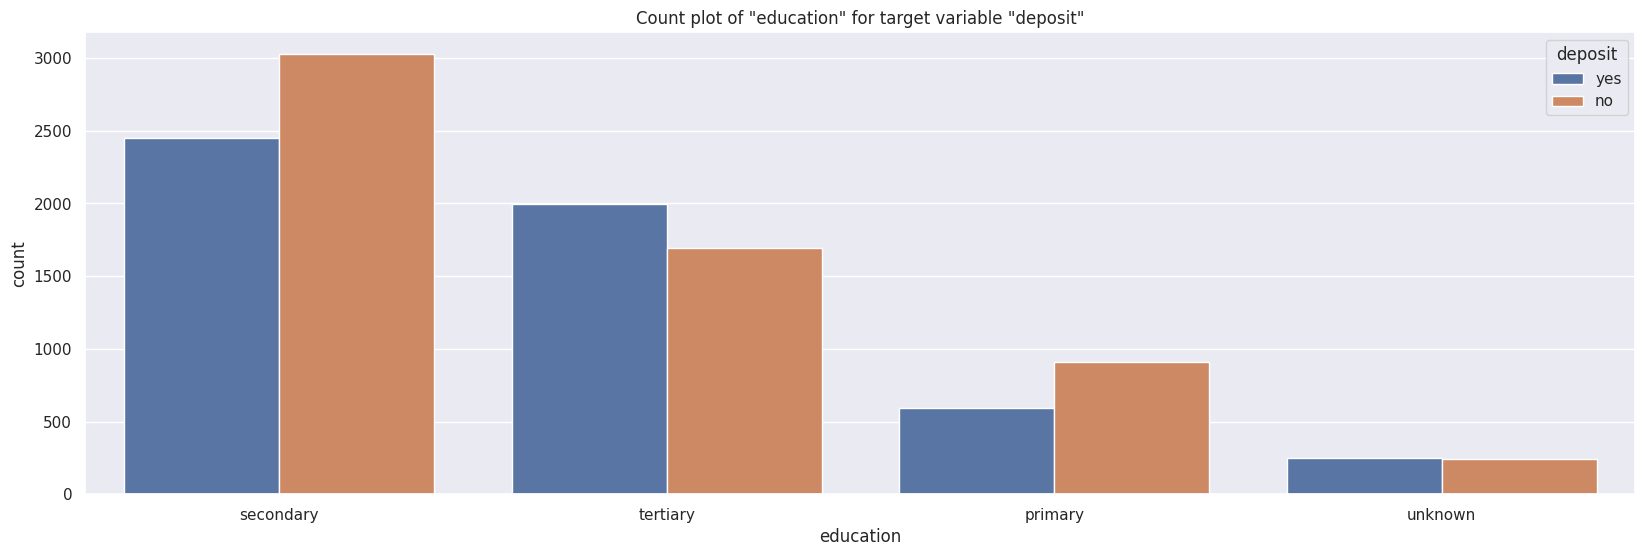

In [ ]:

sns.countplot(x=df['education'], data=df, hue=df['deposit'])
plt.title('Count plot of "education" for target variable "deposit"')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recréation de df_encoded
df_encoded = pd.get_dummies(df)

**Conclusion**
Les personnes ayant un niveau d'éducation plus élevé pourraient être plus enclines à investir dans des dépôts à terme en raison de leur compréhension accrue des avantages financiers.

**Analyse des corrélations**

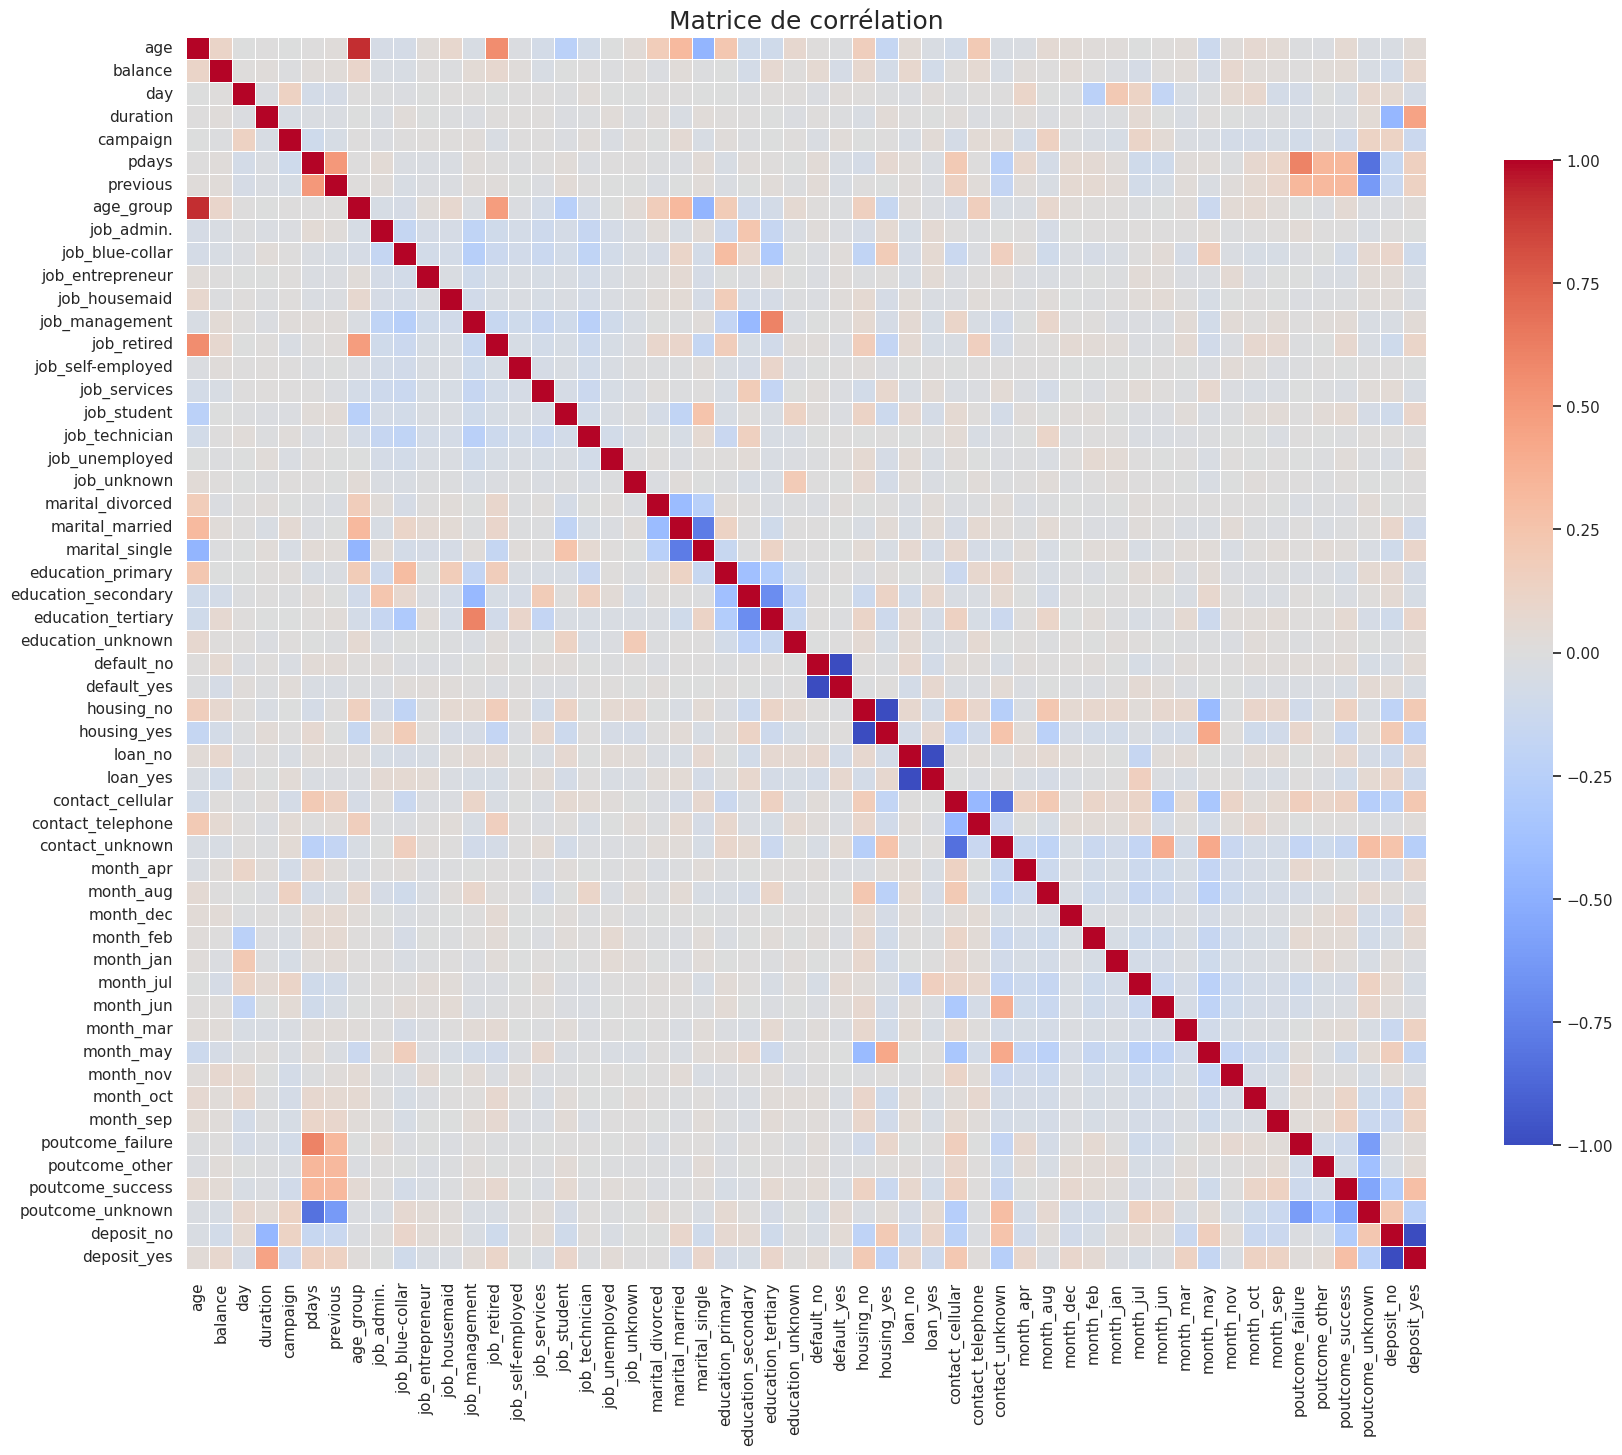

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(
    df_encoded.corr(),
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Matrice de corrélation', fontsize=18)
plt.show()

**Création de nouvelles features (optionnel)**

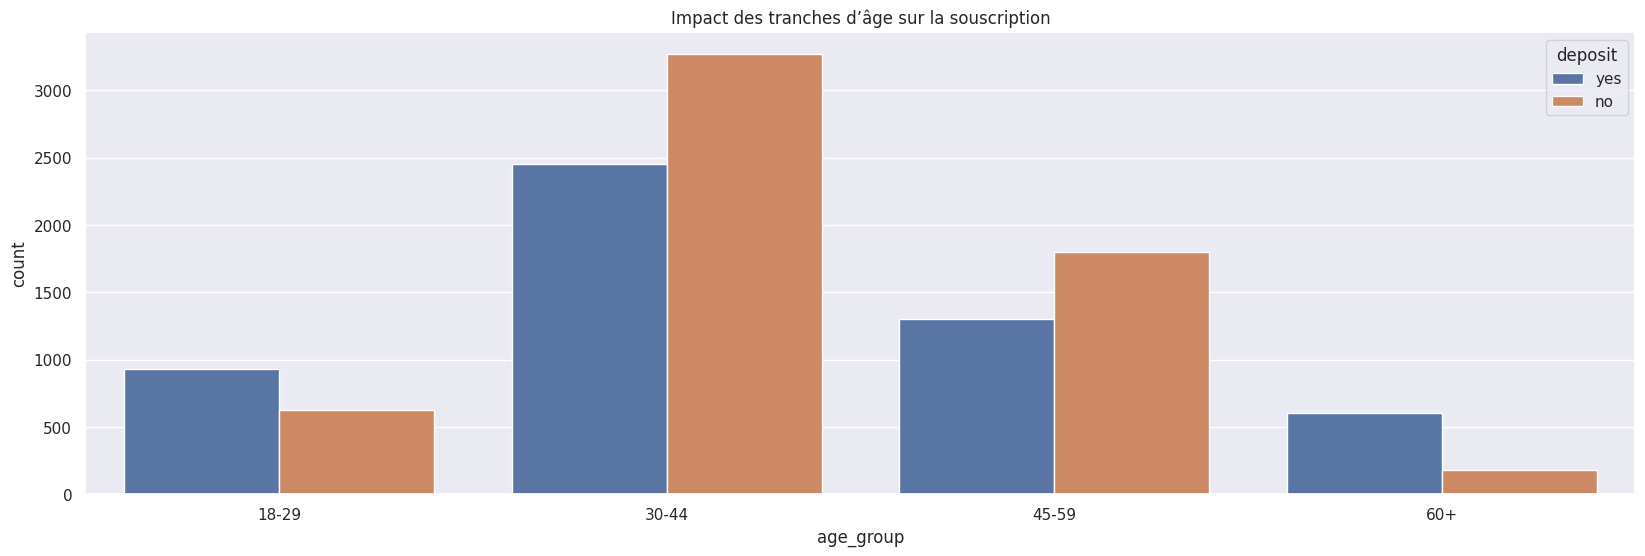

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[17,29,44,59,100], labels=['18-29','30-44','45-59','60+'])
sns.countplot(x='age_group', data=df, hue='deposit')
plt.title('Impact des tranches d’âge sur la souscription')
plt.show()

**: Prétraitement des données**

In [ ]:
#Gestion de la variable cible
# Convertir la cible en numérique
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
#Encodage des variables catégorielles
categorical_cols = ['job','marital','education','contact','month','poutcome','default','housing','loan']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
#Séparation des features et de la target
X = df_encoded.drop('deposit', axis=1)  # toutes les colonnes sauf la cible
y = df_encoded['deposit']               # cible

In [ ]:
#Division train/test


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Vérification finale**

In [ ]:
print(X_train.shape, X_test.shape)
print(X_train[:5])  # Aperçu des features après encodage
print(y_train.value_counts())  # Vérifie la distribution


(8929, 43) (2233, 43)
      age  balance  day  duration  campaign  pdays  previous age_group  \
8644   46      526   31       251         3     -1         0     45-59   
2632   46     2552    3       260         1     94         8     45-59   
3056   25      139   11       202         1     91         1     18-29   
1080   43     3288   21       775         3     -1         0     30-44   
4006   37      217   23       272         2     -1         0     30-44   

      job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
8644            False             False  ...      False      False      False   
2632            False             False  ...      False      False      False   
3056            False             False  ...      False      False      False   
1080            False             False  ...      False       True      False   
4006             True             False  ...      False      False      False   

      month_sep  poutcome_other  poutcome_succ

**Entraînement et évaluation avec XGBoost**

In [ ]:
# Créer le modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,       # nombre d'arbres
    max_depth=6,            # profondeur maximale de chaque arbre
    learning_rate=0.1,      # taux d'apprentissage
    subsample=0.8,          # échantillonnage des données pour chaque arbre
    colsample_bytree=0.8,   # échantillonnage des features pour chaque arbre
    random_state=42,
    eval_metric='logloss'   # métrique pour classification binaire
)

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Encodage de age_group
le = LabelEncoder()
X_train['age_group'] = le.fit_transform(X_train['age_group'])
X_test['age_group'] = le.transform(X_test['age_group'])

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

**Faire des prédictions**

In [ ]:
# Prédictions sur les données de test
y_pred = xgb_model.predict(X_test)

**Évaluer le modèle**

In [ ]:
# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.864308105687416


In [ ]:
# Rapport de classification
print("\nClassification Report :\n", classification_report(y_test, y_pred))




Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      1175
           1       0.84      0.89      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.87      0.86      2233
weighted avg       0.87      0.86      0.86      2233



In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)


Matrice de confusion :
 [[990 185]
 [118 940]]


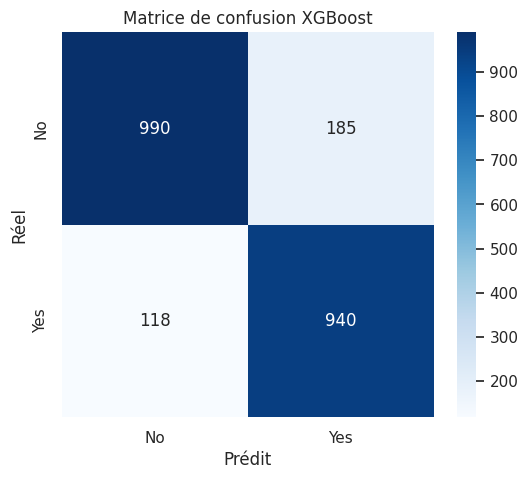

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion XGBoost')
plt.show()